In [31]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# all of the imports
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
% matplotlib inline

In [33]:
#df = pd.read_csv('Obese_region.csv')
df.shape

(156, 22)

In [34]:
df2 = pd.read_csv('Globalisation_Index.csv')

In [35]:
df2.shape

(185, 2)

df3 = pd.merge(df1,df2,on='country') 

In [88]:
df3 = pd.merge(df,df2,on='country') 

In [509]:
#df_Imports = pd.read_csv('Imports.csv')
#df_Imports['Imports_'] = df_Imports['Imports'].str.replace('$','')
#df_Imports['Imports_'] = df_Imports['Imports_'].str.replace(',','')
#df_Imports['Imports_'] =  pd.to_numeric(df_Imports['Imports_'])
df5.columns

Index(['Unnamed: 0', 'country', 'GDPper_cap', 'Insufficiently_active',
       'Percent_Obese', 'HDI', 'Region_Africa', 'Region_Arab_States',
       'Region_Asia_Pacific', 'Region_CIS', 'Region_Europe',
       'Region_North_America', 'Region_Latin_America', 'Region_Unknown',
       'Globalisation Index, overall', 'Globalization_index',
       'Urban_Population', 'Urbanization_Rate', 'Imports', 'Imports_'],
      dtype='object')

In [245]:
df_urban = pd.read_csv('Urbanization.csv')
df_urban.head()

,country,Urban_Population,Urbanization_Rate
0,Monaco,100.0,0.79
1,Nauru,100.0,0.19
2,Singapore,100.0,2.02
3,Vatican City,100.0,0.03
4,Anguilla,100.0,1.19


In [488]:
#df_workforce = pd.read_csv('Workforce.csv')
#df_workforce['Agriculture'] =  pd.to_numeric(df_workforce['Agriculture'])
#df_workforce['Industry'] =  pd.to_numeric(df_workforce['Industry'])
#df_workforce['Service'] =  pd.to_numeric(df_workforce['Service'])
df_workforce.head()

,country,Agriculture,Industry,Service
0,World,36.6,21.4,41.9
1,China,38.1,27.8,34.1
2,India,52.0,14.0,34.0
3,European Union,4.7,28.7,66.6
4,United States,0.7,20.3,79.1


In [511]:
df5['Imports'] = df5['Imports_']

In [512]:
#df5 = pd.merge(df4,df_Imports,on='country')
df5.head()

,Unnamed: 0,country,GDPper_cap,Insufficiently_active,Percent_Obese,HDI,Region_Africa,Region_Arab_States,Region_Asia_Pacific,Region_CIS,Region_Europe,Region_North_America,Region_Latin_America,Region_Unknown,"Globalisation Index, overall",Globalization_index,Urban_Population,Urbanization_Rate,Imports,Imports_
0,0,Qatar,127700,41.6,42.3,0.856,0,1,0,0,0,0,0,0,74.39,74.39,99.2,6.02,3.376000e+10,3.376000e+10
1,1,Luxembourg,10400,28.5,23.1,0.898,0,0,0,0,1,0,0,0,79.33,79.33,90.2,1.71,1.833000e+10,1.833000e+10
2,2,Singapore,87900,33.1,6.2,0.925,0,0,1,0,0,0,0,0,78.63,78.63,100.0,2.02,2.713000e+11,2.713000e+11
3,3,Kuwait,71900,56.6,39.7,0.800,0,1,0,0,0,0,0,0,70.21,70.21,98.3,3.63,2.832000e+10,2.832000e+10
4,4,Ireland,69200,35.1,25.6,0.923,0,0,0,0,1,0,0,0,83.53,83.53,63.2,1.58,8.801000e+10,8.801000e+10


In [247]:
df4['Urbanization_Rate'] = pd.to_numeric(df4['Urbanization_Rate'])

In [86]:
df2['Globalization_index'] = pd.to_numeric(df2['Globalisation Index, overall'])

In [508]:
df5.head()

,Unnamed: 0,country,GDPper_cap,Insufficiently_active,Percent_Obese,HDI,Region_Africa,Region_Arab_States,Region_Asia_Pacific,Region_CIS,Region_Europe,Region_North_America,Region_Latin_America,Region_Unknown,"Globalisation Index, overall",Globalization_index,Urban_Population,Urbanization_Rate,Imports,Imports_
0,0,Qatar,127700,41.6,42.3,0.856,0,1,0,0,0,0,0,0,74.39,74.39,99.2,6.02,"$33,760,000,000",3.376000e+10
1,1,Luxembourg,10400,28.5,23.1,0.898,0,0,0,0,1,0,0,0,79.33,79.33,90.2,1.71,"$18,330,000,000",1.833000e+10
2,2,Singapore,87900,33.1,6.2,0.925,0,0,1,0,0,0,0,0,78.63,78.63,100.0,2.02,"$271,300,000,000",2.713000e+11
3,3,Kuwait,71900,56.6,39.7,0.800,0,1,0,0,0,0,0,0,70.21,70.21,98.3,3.63,"$28,320,000,000",2.832000e+10
4,4,Ireland,69200,35.1,25.6,0.923,0,0,0,0,1,0,0,0,83.53,83.53,63.2,1.58,"$88,010,000,000",8.801000e+10


In [101]:
df = pd.read_csv('./data/Countries_Obesity_data.csv')
df.shape

(156, 24)

In [102]:
import pandas as pd
# all of the imports
import pandas as pd
import numpy as np
import pickle 
import patsy
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
% matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

In [99]:
y, X = patsy.dmatrices('Percent_Obese ~ np.log(Imports) + Insufficiently_active + Education + Urban_Population:Region_Arab_States + Urbanization_Rate*Region_Asia_Pacific + Globalization_index:Region_Asia_Pacific + GDPper_cap:Region_Europe + Urbanization_Rate:np.log(GDPper_cap)', data=df, return_type="dataframe")
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Percent_Obese   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     40.96
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           2.31e-37
Time:                        07:23:05   Log-Likelihood:                -478.47
No. Observations:                 156   AIC:                             978.9
Df Residuals:                     145   BIC:                             1012.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  10.0592      4.873      2.064      0.041       0.428      19.691
np.log(Imports)                            -0.5700      0.144     -3.946      0.000      -0.856      -0.285
Insufficiently_active                       0.1493      0.048      3.122      0.002       0.055       0.244
Education                                  32.6549      4.989      6.545      0.000      22.794      42.516
Urban_Population:Region_Arab_States         0.0746      0.023      3.210      0.002       0.029       0.121
Urbanization_Rate                          -7.0291      1.674     -4.198      0.000     -10.338      -3.720
Region_Asia_Pacific                        49.3095      6.217      7.931      0.000      37.021      61.598
Urbanization_Rate:Region_Asia_Pacific      -4.2900      0.996     -4.307      0.000      -6.259      -2.321
Globalization_index:Region_Asia_Pacific    -0.7279      0.089     -8.223      0.000      -0.903      -0.553
GDPper_cap:Region_Europe                   -0.0001   3.57e-05     -3.214      0.002      -0.000   -4.42e-05
Urbanization_Rate:np.log(GDPper_cap)        0.7399      0.179      4.130      0.000       0.386       1.094
==============================================================================
Omnibus:                       18.306   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.471
Skew:                          -0.146   Prob(JB):                     1.83e-16
Kurtosis:                       6.326   Cond. No.                     2.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
model = smf.ols(formula= 'Percent_Obese ~ np.log(Imports) + Insufficiently_active + Education + Urban_Population:Region_Arab_States + Urbanization_Rate*Region_Asia_Pacific + Globalization_index:Region_Asia_Pacific + GDPper_cap:Region_Europe + Urbanization_Rate:np.log(GDPper_cap)', data=df)
model_fit = model.fit()


In [107]:
model_elast = model.fit_regularized(method='elastic_net', alpha=0.000001, L1_wt=1.0, start_params=None, profile_scale=False, refit=False)

In [108]:
model_elast.params

Intercept                                   5.784920
np.log(Imports)                            -0.286566
Insufficiently_active                       0.203705
Education                                  27.929002
Urban_Population:Region_Arab_States         0.085509
Urbanization_Rate                          -4.918706
Region_Asia_Pacific                        40.747514
Urbanization_Rate:Region_Asia_Pacific      -3.846594
Globalization_index:Region_Asia_Pacific    -0.591669
GDPper_cap:Region_Europe                   -0.000106
Urbanization_Rate:np.log(GDPper_cap)        0.457568
dtype: float64

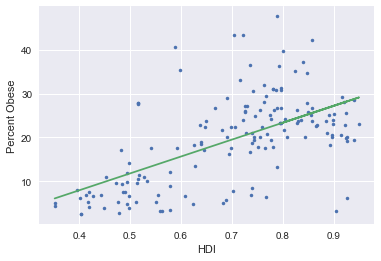

In [74]:
'''''''''
fig, ax = plt.subplots()
ax.scatter(df.HDI, df.Percent_Obese, edgecolors=(0, 0, 0))
ax.plot([df.HDI.min(), df.HDI.max()], [df.Percent_Obese.min(), df.Percent_Obese.max()], 'k-', lw=2)
ax.set_xlabel('HDI')
ax.set_ylabel('Percent Obese')
plt.show()
'''''''''
fig, ax = plt.subplots()
ax.set_xlabel('HDI')
ax.set_ylabel('Percent Obese')
m, b = np.polyfit(df.HDI, df.Percent_Obese, 1)
plt.plot(df.HDI, df.Percent_Obese, '.')
plt.plot(df.HDI, m*df.HDI + b, '-');

In [112]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

In [114]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'Percent_Obese', data=df, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]
for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

ValueError: all the input array dimensions except for the concatenation axis must match exactly

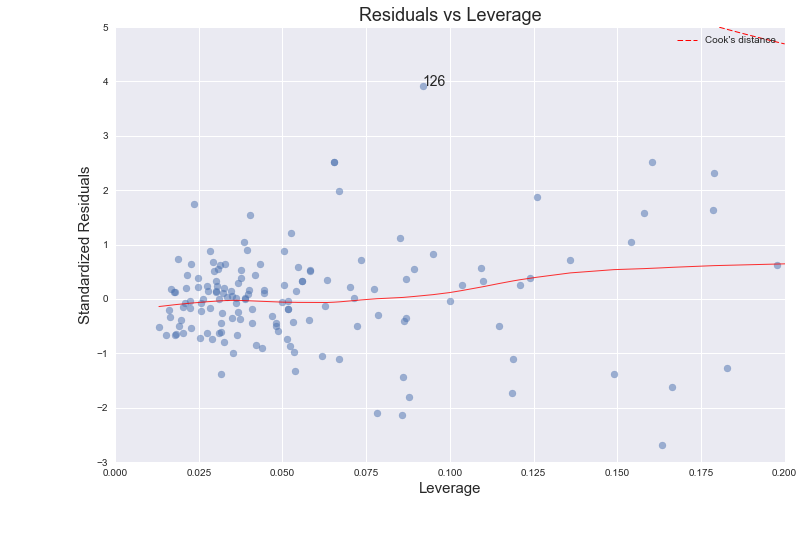

In [560]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')
# annotations
leverage_top_3 = np.flipud(np.argsort(model_cooks))[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
# for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')
p = len(model_fit.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

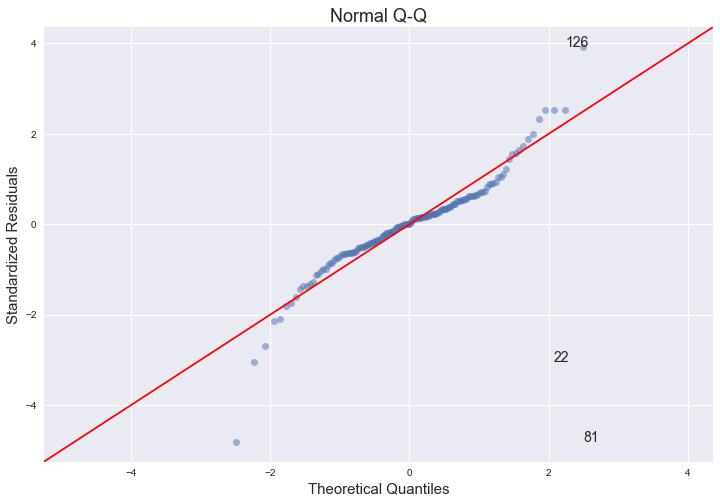

In [569]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flipud(np.argsort(np.abs(model_norm_residuals)))
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flipud(QQ.theoretical_quantiles)[r],
                                   model_norm_residuals[i]));

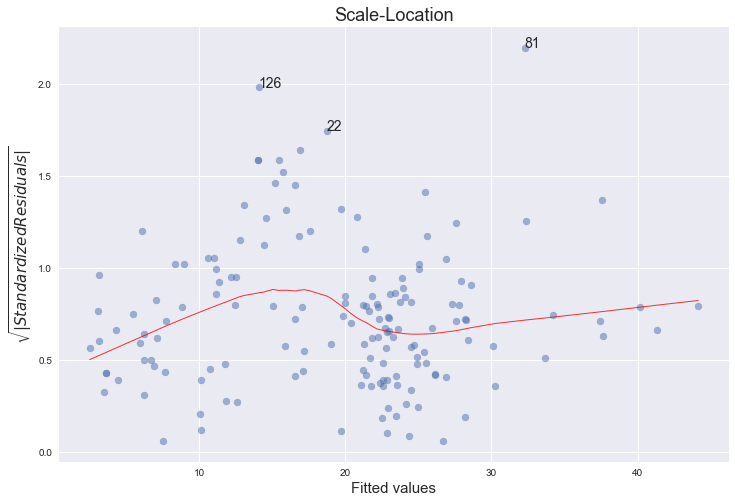

In [570]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');
# annotations
abs_sq_norm_resid = np.flipud(np.argsort(model_norm_residuals_abs_sqrt))
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));


In [577]:
df5

,Unnamed: 0,country,GDPper_cap,Insufficiently_active,Percent_Obese,HDI,Region_Africa,Region_Arab_States,Region_Asia_Pacific,Region_CIS,Region_Europe,Region_North_America,Region_Latin_America,Region_Unknown,"Globalisation Index, overall",Globalization_index,Urban_Population,Urbanization_Rate,Imports,Imports_
0,0,Qatar,127700,41.6,42.3,0.856,0,1,0,0,0,0,0,0,74.39,74.39,99.2,6.02,3.376000e+10,3.376000e+10
1,1,Luxembourg,10400,28.5,23.1,0.898,0,0,0,0,1,0,0,0,79.33,79.33,90.2,1.71,1.833000e+10,1.833000e+10
2,2,Singapore,87900,33.1,6.2,0.925,0,0,1,0,0,0,0,0,78.63,78.63,100.0,2.02,2.713000e+11,2.713000e+11
3,3,Kuwait,71900,56.6,39.7,0.800,0,1,0,0,0,0,0,0,70.21,70.21,98.3,3.63,2.832000e+10,2.832000e+10
4,4,Ireland,69200,35.1,25.6,0.923,0,0,0,0,1,0,0,0,83.53,83.53,63.2,1.58,8.801000e+10,8.801000e+10
5,5,Norway,69200,25.8,23.1,0.949,0,0,0,0,1,0,0,0,85.81,85.81,80.5,1.35,7.302000e+10,7.302000e+10
6,6,United Arab Emirates,67900,38.4,37.2,0.840,0,1,0,0,0,0,0,0,84.56,84.56,85.5,2.87,2.469000e+11,2.469000e+11
7,7,Switzerland,59600,24.5,19.4,0.939,0,0,0,0,1,0,0,0,89.70,89.70,73.9,1.88,2.434000e+11,2.434000e+11
8,8,Saudi Arabia,55200,61.0,34.7,0.847,0,1,0,0,0,0,0,0,61.86,61.86,83.1,2.10,1.577000e+11,1.577000e+11
9,9,Netherlands,51000,15.5,19.8,0.924,0,0,0,0,1,0,0,0,90.24,90.24,90.5,1.05,3.763000e+11,3.763000e+11


In [543]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

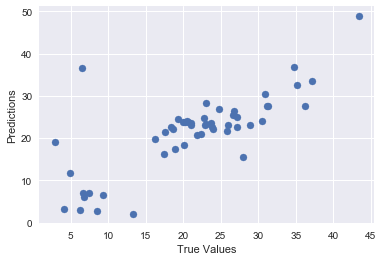

In [517]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [30]:
from sklearn.cross_validation import cross_val_score
y = np.ravel(y)
scores = cross_val_score(model, X, y, cv=100, scoring='neg_mean_squared_error')
print('Stratified %i folds cross validation mean' + 'Folds: %i, mean squared error: %.2f std: %.2f'
%(len(scores),np.mean(np.abs(scores)),np.std(scores)))

TypeError: Cannot clone object '<statsmodels.regression.linear_model.OLS object at 0x116f3c160>' (type <class 'statsmodels.regression.linear_model.OLS'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [110]:
df = pd.read_csv('Model_Data.csv')

In [3]:
df = df[['Percent_Obese', 'country','GDPper_cap','Insufficiently_active','HDI','Region_Africa','Region_Arab_States','Region_Europe','Region_Asia_Pacific','Region_Latin_America','Globalization_index','Urbanization_Rate','Urban_Population','Imports']]

In [111]:
df.sort_values('Education',ascending=False)

,Unnamed: 0,Country,Percent_Obese,GDPper_cap,Insufficiently_active,Education,Region_Africa,Region_Arab_States,Region_Europe,Region_Asia,...,Urbanization_Rate,Urban_Population,Imports,log(Imports),log(Imports)*Asia,Asia*Urbanization,UrbanPop*ArabStates,Asia*Globalization,Urbanization*GDPpercap,Europe*GDPpercap
14,14,Australia,28.6,48900,23.8,0.927,0,0,0,0,...,1.47,89.4,2.031000e+11,26.036964,0.000000,0.00,0.0,0.00,15.872373,0
26,26,New Zealand,29.2,37300,39.8,0.917,0,0,0,0,...,1.05,86.3,3.483000e+10,24.273745,0.000000,0.00,0.0,0.00,11.053086,0
6,6,Norway,23.1,69200,25.8,0.910,0,0,1,0,...,1.35,80.5,7.302000e+10,25.013999,0.000000,0.00,0.0,0.00,15.045421,69200
10,10,Netherlands,19.8,51000,15.5,0.894,0,0,1,0,...,1.05,90.5,3.763000e+11,26.653653,0.000000,0.00,0.0,0.00,11.381560,51000
5,5,Ireland,25.6,69200,35.1,0.887,0,0,1,0,...,1.58,63.2,8.801000e+10,25.200716,0.000000,0.00,0.0,0.00,17.608715,69200
15,15,Germany,20.1,48100,21.1,0.884,0,0,1,0,...,0.16,75.3,9.876000e+11,27.618544,0.000000,0.00,0.0,0.00,1.724966,48100
33,33,Lithuania,25.9,30000,18.4,0.877,0,0,1,0,...,-0.53,66.5,2.592000e+10,23.978281,0.000000,-0.00,0.0,0.00,-5.463745,30000
17,17,Denmark,19.3,48000,24.3,0.873,0,0,1,0,...,0.60,87.7,8.229000e+10,25.133515,0.000000,0.00,0.0,0.00,6.467374,48000
31,31,Slovenia,25.1,32100,21.3,0.863,0,0,1,0,...,0.08,49.6,2.552000e+10,23.962728,0.000000,0.00,0.0,0.00,0.830129,32100
34,34,Estonia,22.6,29300,11.9,0.859,0,0,1,0,...,-0.45,67.5,1.346000e+10,23.322988,0.000000,-0.00,0.0,0.00,-4.628404,29300
